In [122]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Question 1

In [123]:
# Function to simulate battery life measurements based on the claimed distribution
def simulate_battery_life(n1, mu=20, sigma=2):
    return np.random.normal(mu, sigma, n1)

In [124]:
# Function to estimate parameters using Maximum Likelihood Estimation (MLE)
def mle_estimate(data):
    mu_hat = np.mean(data)  # MLE for mean
    sigma_hat = np.std(data, ddof=0)  # MLE for std (using population formula)
    return mu_hat, sigma_hat

In [125]:
# Function to run multiple simulations to analyze the variability of estimates
def multiple_simulations(n1, n2, true_mu=20, true_sigma=2):
    mu_estimates = []
    sigma_estimates = []
    for _ in range(n2):
        data = simulate_battery_life(n1, true_mu, true_sigma)
        mu_hat, sigma_hat = mle_estimate(data)
        mu_estimates.append(mu_hat)
        sigma_estimates.append(sigma_hat)
    return np.array(mu_estimates), np.array(sigma_estimates)

In [126]:
def main():
  n1_values= [10,100,1000]
  n2_values = [100,1000]
  for n1 in n1_values:
    for n2 in n2_values:

      # Single simulation for visualization
      data = simulate_battery_life(n1)
      mu_hat, sigma_hat = mle_estimate(data)

      # Plot the histogram of simulated data and overlay the estimated normal PDF
      plt.figure(figsize=(8, 5))
      plt.hist(data, bins=20, density=True, alpha=0.6, color='skyblue', label='Simulated Data')
      xmin, xmax = plt.xlim()
      x = np.linspace(xmin, xmax, 100)
      p_true = stats.norm.pdf(x,20,2)
      plt.plot(x,p_true,"g",linewidth=2,label=f'True Normal PDF (μ={mu_hat:.2f}, σ={sigma_hat:.2f})')
      p = stats.norm.pdf(x, mu_hat, sigma_hat)
      plt.plot(x, p, 'r', linewidth=2, label=f'Normal PDF (μ={mu_hat:.2f}, σ={sigma_hat:.2f})')
      plt.title('Histogram of Simulated Battery Life Data')
      plt.xlabel('Battery Life (hours)')
      plt.ylabel('Density')
      plt.legend()
      plt.show()

      # Multiple simulations to analyze the variability of estimates
      mu_estimates, sigma_estimates = multiple_simulations(n1, n2)

      # Plot histogram of estimated means
      plt.figure(figsize=(12, 5))

      plt.subplot(1, 2, 1)
      plt.hist(mu_estimates, bins=30, density=True, alpha=0.75, color='blue', label='Estimated Means')
      plt.axvline(20, color='red', linestyle='dashed', linewidth=2, label="True μ = 20")
      plt.title(f"Histogram of Estimated Means (n1={n1}, n2={n2})")
      plt.xlabel("Estimated Mean")
      plt.ylabel("Density")
      plt.legend()

      # Plot histogram of estimated standard deviations
      plt.subplot(1, 2, 2)
      plt.hist(sigma_estimates, bins=30, density=True, alpha=0.75, color='green', label='Estimated Std Devs')
      plt.axvline(2, color='red', linestyle='dashed', linewidth=2, label="True σ = 2")
      plt.title(f"Histogram of Estimated Std Devs (n1={n1}, n2={n2})")
      plt.xlabel("Estimated Standard Deviation")
      plt.ylabel("Density")
      plt.legend()

      plt.tight_layout()
      plt.show()

      print("Summary of Simulation Results:")
      print(f"Estimated Mean (μ): Mean = {np.mean(mu_estimates):.3f}, Std = {np.std(mu_estimates):.3f}")
      print(f"Estimated Std (σ): Mean = {np.mean(sigma_estimates):.3f}, Std = {np.std(sigma_estimates):.3f}")

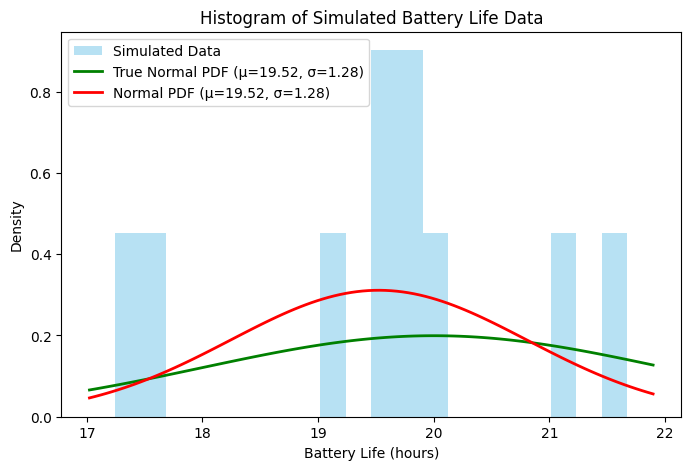

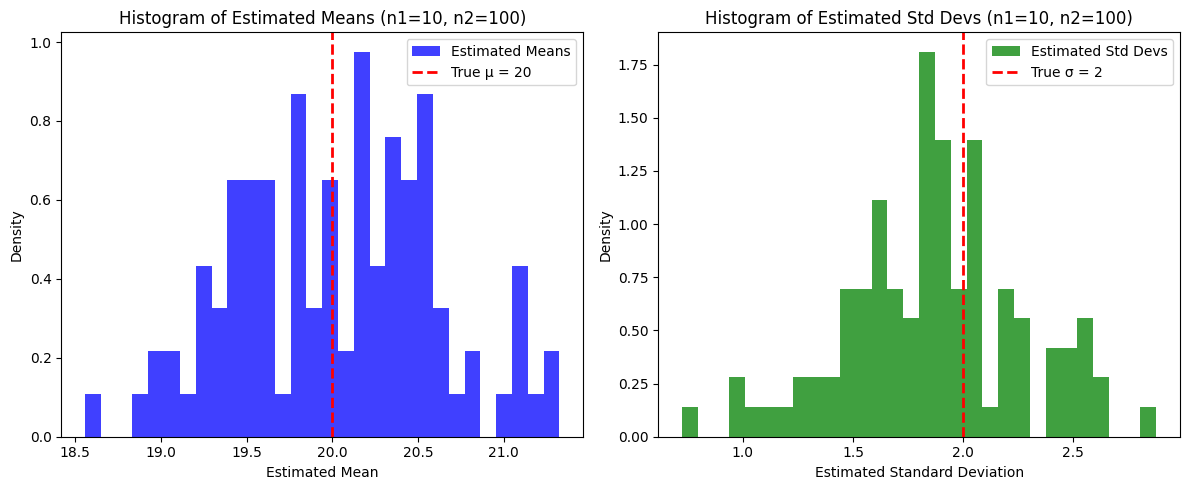

Summary of Simulation Results:
Estimated Mean (μ): Mean = 20.023, Std = 0.589
Estimated Std (σ): Mean = 1.865, Std = 0.402


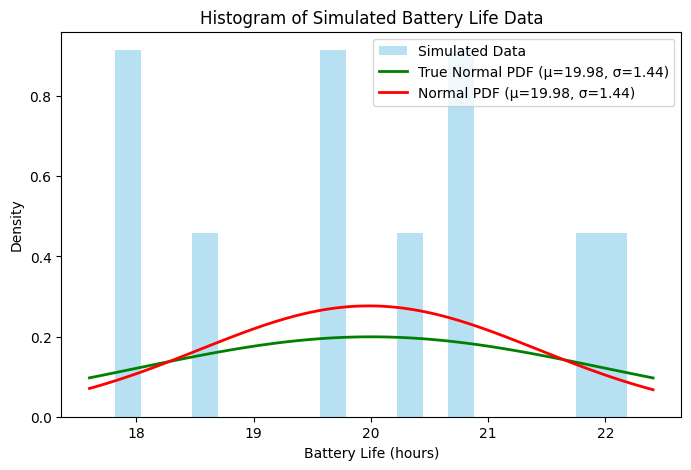

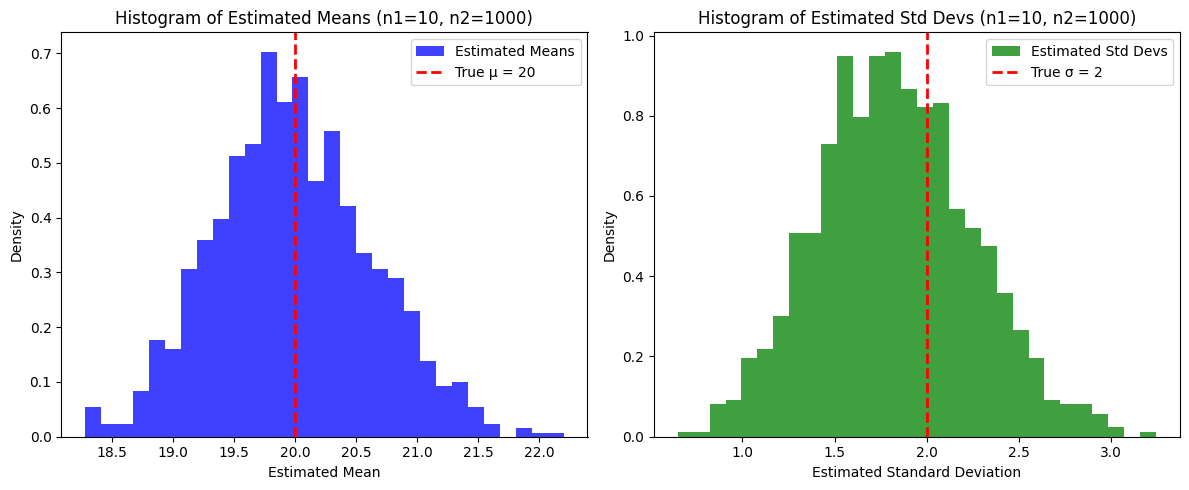

Summary of Simulation Results:
Estimated Mean (μ): Mean = 19.981, Std = 0.640
Estimated Std (σ): Mean = 1.828, Std = 0.420


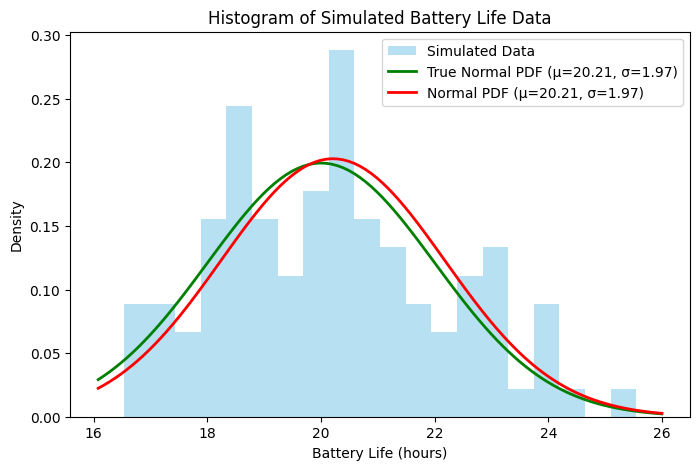

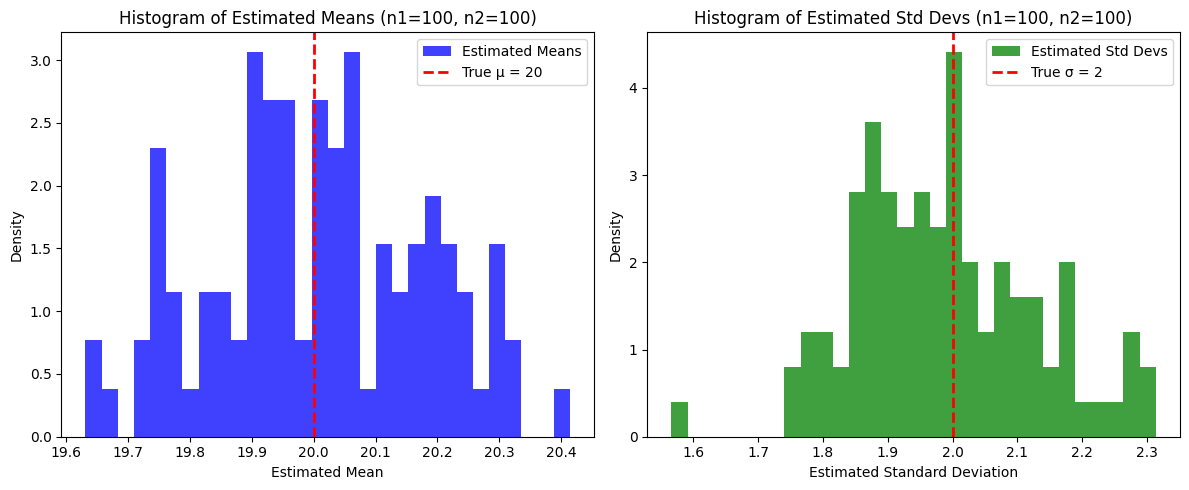

Summary of Simulation Results:
Estimated Mean (μ): Mean = 20.008, Std = 0.175
Estimated Std (σ): Mean = 1.986, Std = 0.139


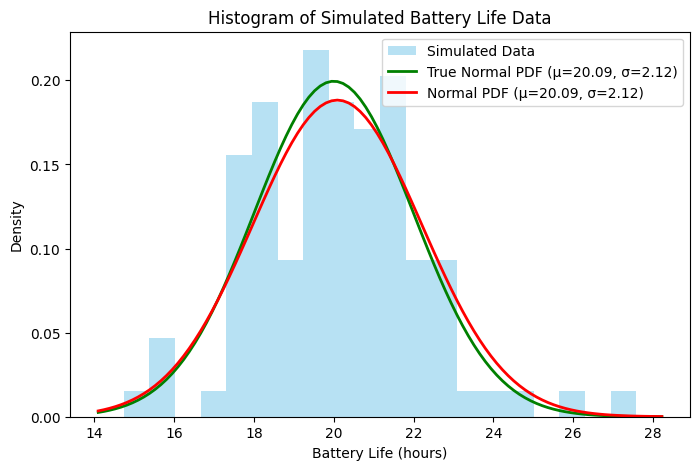

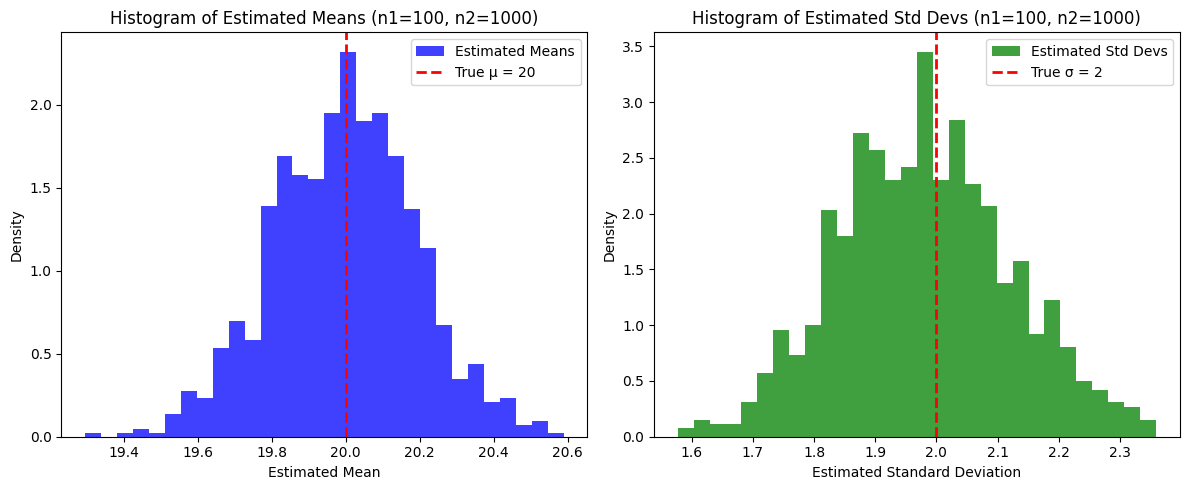

Summary of Simulation Results:
Estimated Mean (μ): Mean = 19.996, Std = 0.193
Estimated Std (σ): Mean = 1.980, Std = 0.140


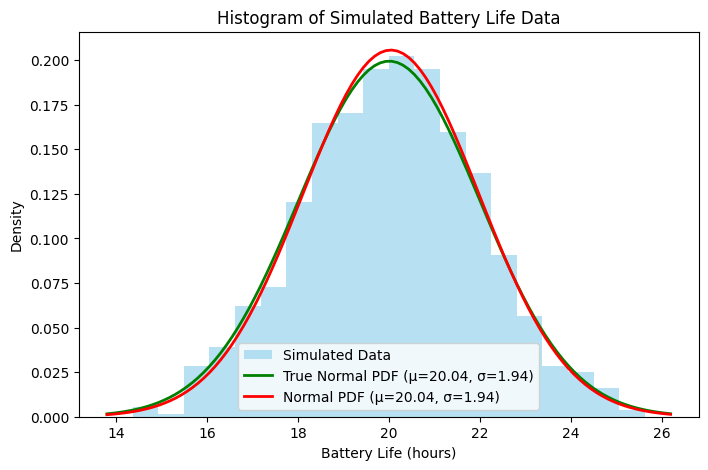

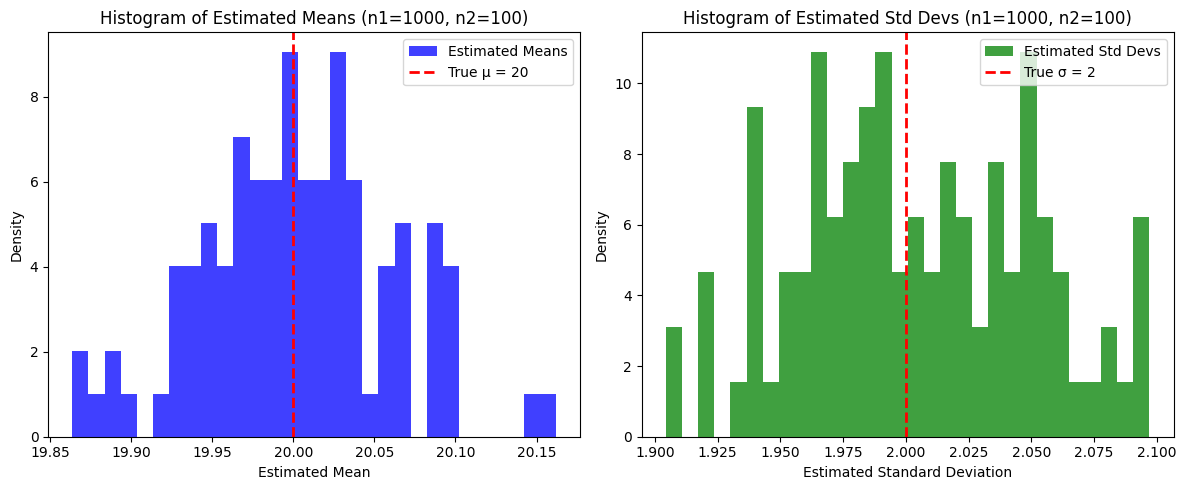

Summary of Simulation Results:
Estimated Mean (μ): Mean = 20.001, Std = 0.058
Estimated Std (σ): Mean = 2.003, Std = 0.046


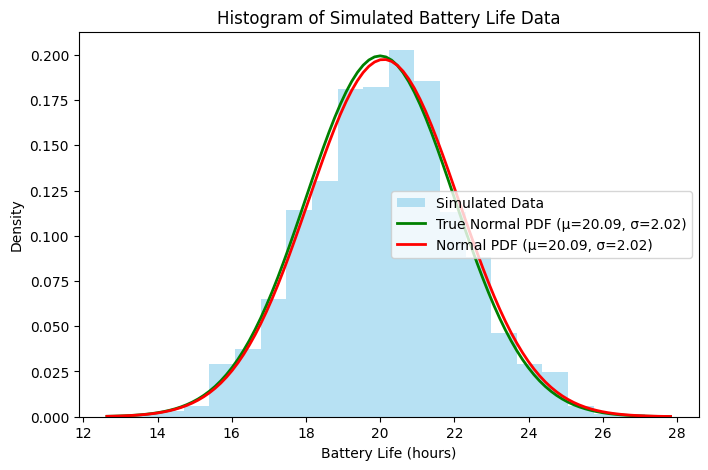

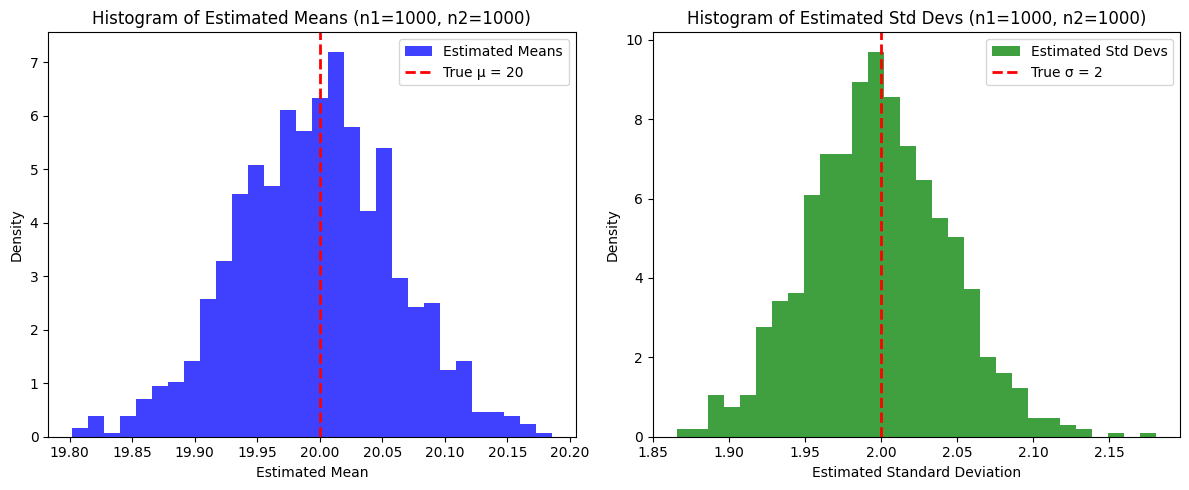

Summary of Simulation Results:
Estimated Mean (μ): Mean = 19.997, Std = 0.063
Estimated Std (σ): Mean = 1.998, Std = 0.046


In [127]:
if __name__=="__main__":
  main()

## Question 2

In [128]:
# Function to simulate measured temperature values
def simulate_temperature(n1, true_mu=50, true_sigma=5):
    X = np.random.normal(true_mu, true_sigma, n1)
    noise = np.random.uniform(-1, 1, n1)
    Y = X + noise
    return X, Y

In [129]:
# Function to estimate the parameters of X from noisy measurements Y
def mle_estimate_temperature(Y):
    # MLE for the mean (same as sample mean)
    mu_hat = np.mean(Y)

    # MLE for the variance of Y (population variance, ddof=0)
    var_Y = np.mean((Y - mu_hat)**2)

    # Known variance of noise (Uniform(-1,1))
    noise_var = 4/12  # equals 1/3

    # Estimate variance of X by subtracting noise variance
    var_X_hat = var_Y - noise_var

    # In case of very small sample sizes, ensure non-negative variance
    var_X_hat = max(var_X_hat, 0)
    sigma_hat = np.sqrt(var_X_hat)

    return mu_hat, sigma_hat

In [130]:
# Function to perform multiple simulations and collect estimates
def multiple_simulations(n1, n2, true_mu=50, true_sigma=5):
    mu_estimates = []
    sigma_estimates = []

    for _ in range(n2):
        _, Y = simulate_temperature(n1, true_mu, true_sigma)
        mu_hat, sigma_hat = mle_estimate_temperature(Y)
        mu_estimates.append(mu_hat)
        sigma_estimates.append(sigma_hat)

    return np.array(mu_estimates), np.array(sigma_estimates)

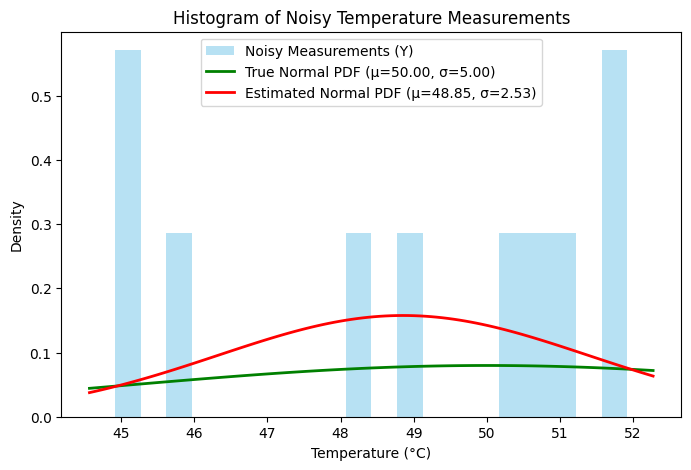

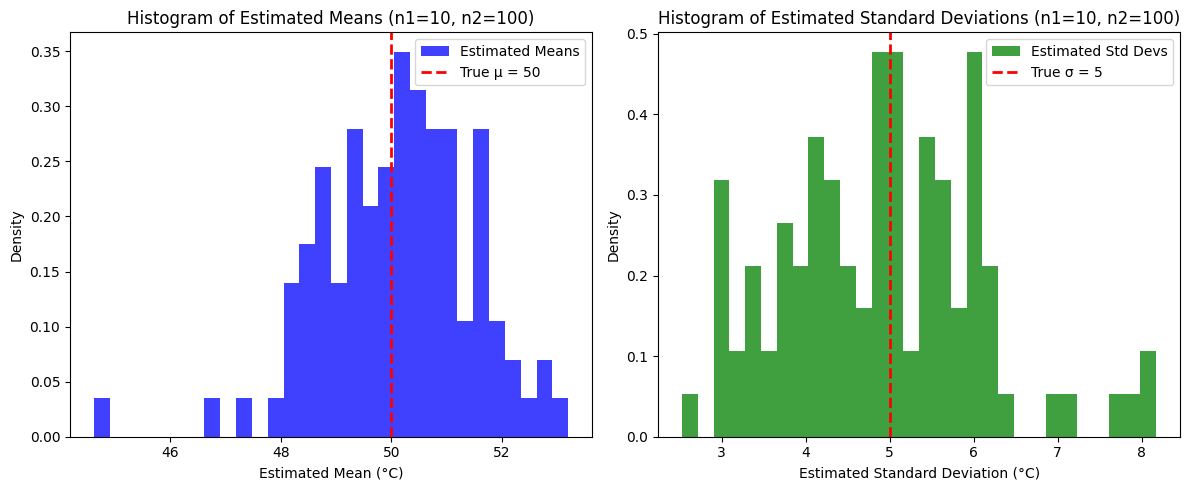

Summary of Simulation Results:
Estimated Mean (μ): Mean = 50.098, Std = 1.366
Estimated Std (σ): Mean = 4.890, Std = 1.184


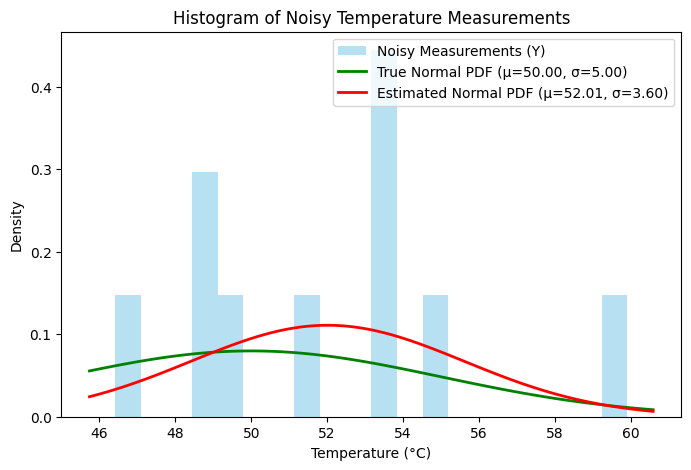

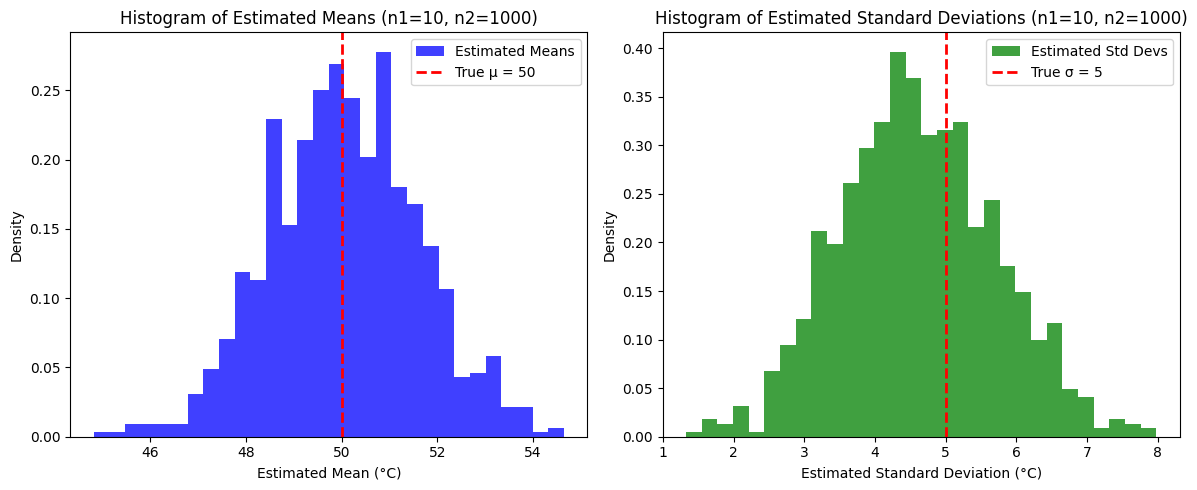

Summary of Simulation Results:
Estimated Mean (μ): Mean = 50.061, Std = 1.545
Estimated Std (σ): Mean = 4.604, Std = 1.102


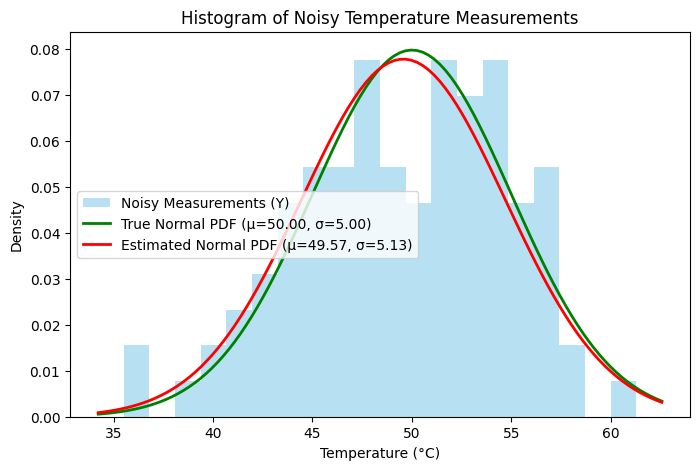

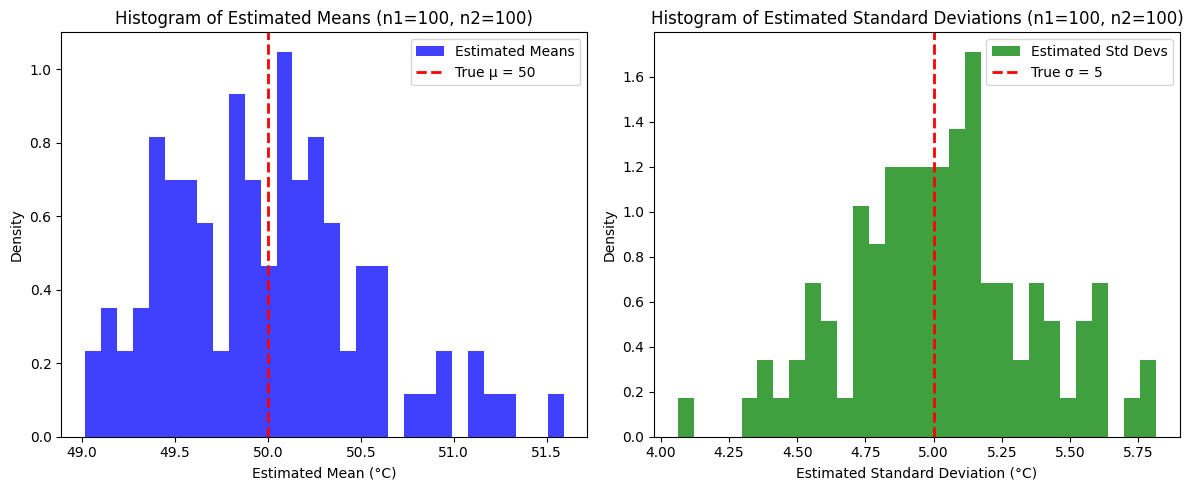

Summary of Simulation Results:
Estimated Mean (μ): Mean = 49.987, Std = 0.532
Estimated Std (σ): Mean = 5.024, Std = 0.340


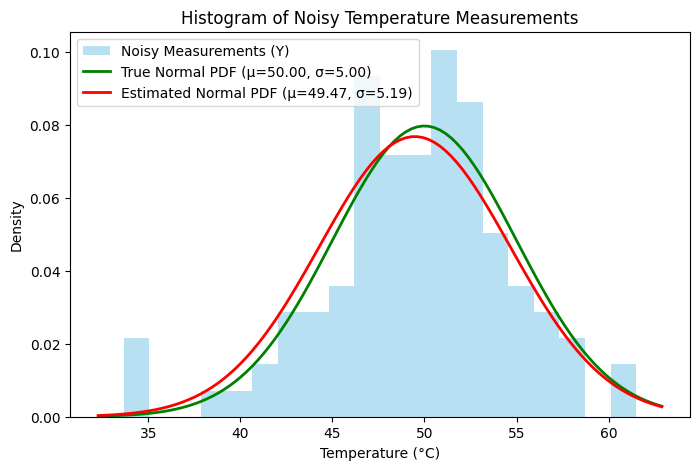

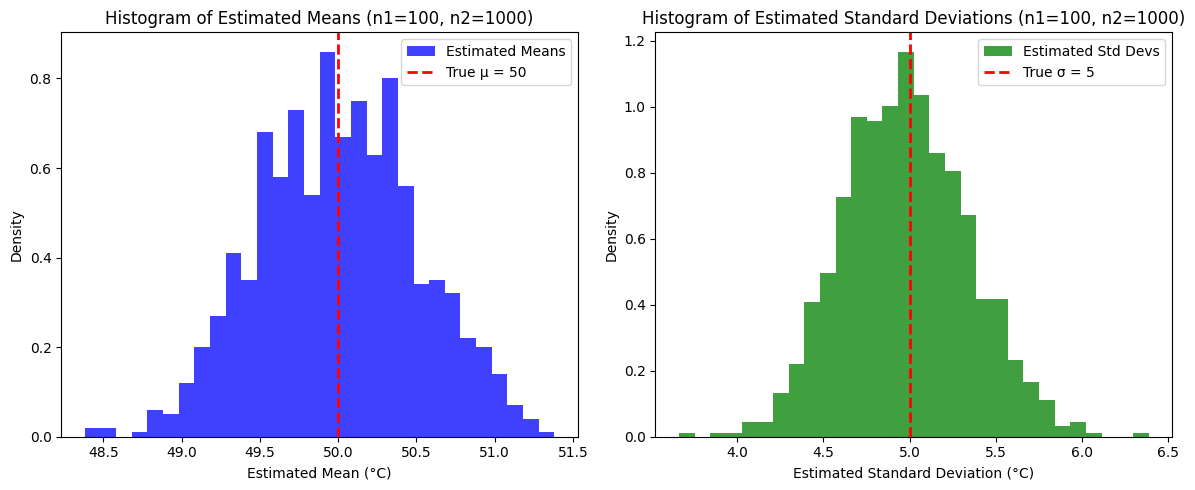

Summary of Simulation Results:
Estimated Mean (μ): Mean = 50.003, Std = 0.506
Estimated Std (σ): Mean = 4.978, Std = 0.361


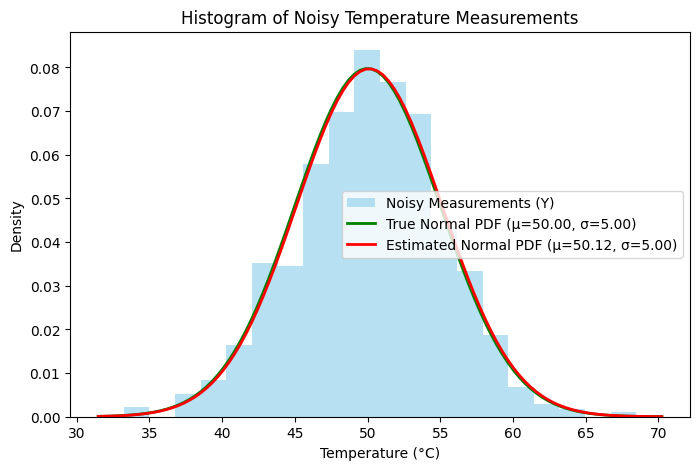

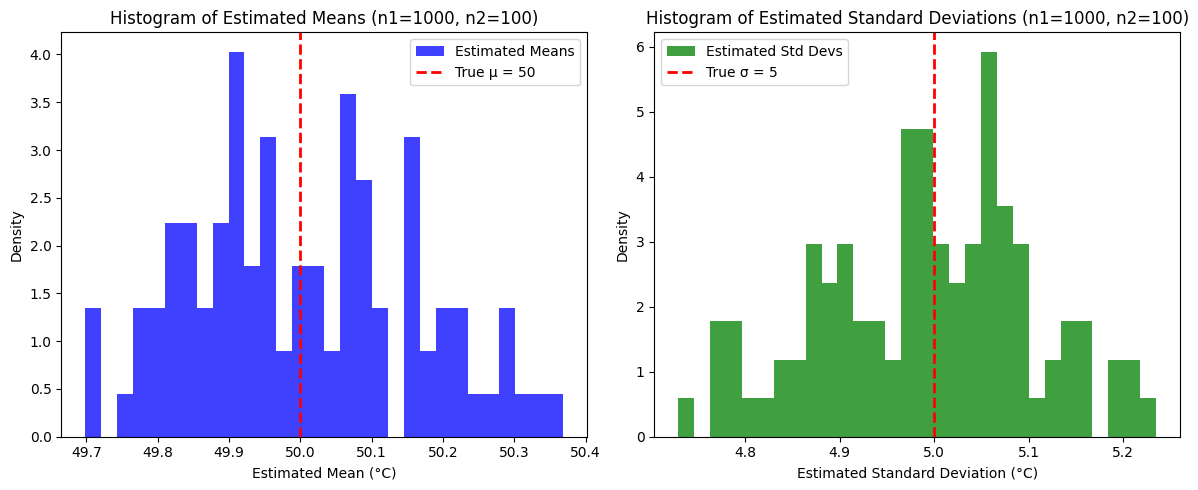

Summary of Simulation Results:
Estimated Mean (μ): Mean = 50.002, Std = 0.157
Estimated Std (σ): Mean = 4.992, Std = 0.112


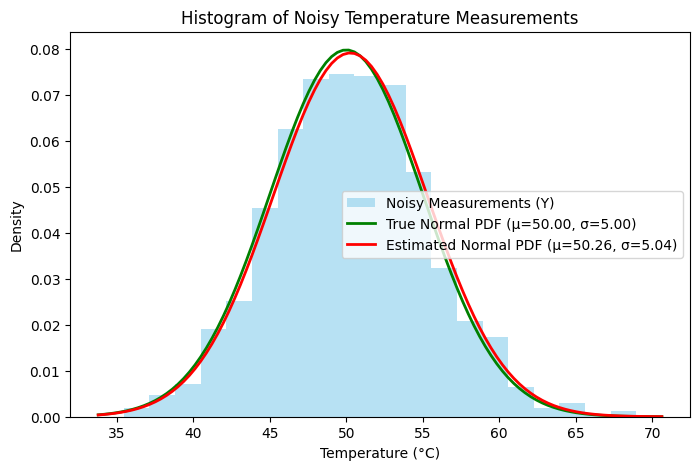

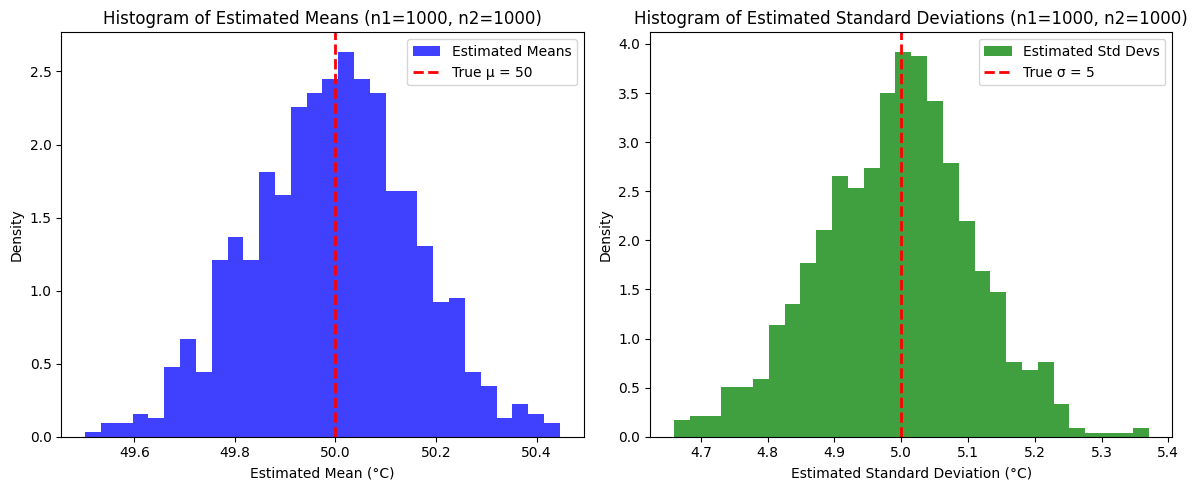

Summary of Simulation Results:
Estimated Mean (μ): Mean = 49.995, Std = 0.160
Estimated Std (σ): Mean = 4.992, Std = 0.115


In [131]:
if __name__=="__main__":
  n1_values= [10,100,1000]
  n2_values= [100,1000]
  for n1 in n1_values:
    for n2 in n2_values:

      # (i) Single simulation and plot of measured temperatures
      X_true, Y = simulate_temperature(n1)
      mu_hat, sigma_hat = mle_estimate_temperature(Y)

      # Plot histogram of noisy measurements Y and overlay normal PDF using estimated parameters for X
      plt.figure(figsize=(8, 5))
      plt.hist(Y, bins=20, density=True, alpha=0.6, color='skyblue', label='Noisy Measurements (Y)')
      xmin, xmax = plt.xlim()
      x = np.linspace(xmin, xmax, 100)
      p_true = stats.norm.pdf(x,50,5)
      plt.plot(x,p_true,"g",linewidth=2, label=f'True Normal PDF (μ={50:.2f}, σ={5:.2f})')
      # Overlay PDF for true temperature X using estimated parameters
      p = stats.norm.pdf(x, mu_hat, sigma_hat)
      plt.plot(x, p, 'r', linewidth=2, label=f'Estimated Normal PDF (μ={mu_hat:.2f}, σ={sigma_hat:.2f})')
      plt.title('Histogram of Noisy Temperature Measurements')
      plt.xlabel('Temperature (°C)')
      plt.ylabel('Density')
      plt.legend()
      plt.show()

      # (ii) Multiple simulations to analyze variability of estimates
      mu_estimates, sigma_estimates = multiple_simulations(n1, n2)

      # Plot histogram of estimated means and estimated standard deviations
      plt.figure(figsize=(12, 5))

      plt.subplot(1, 2, 1)
      plt.hist(mu_estimates, bins=30, density=True, alpha=0.75, color='blue', label='Estimated Means')
      plt.axvline(50, color='red', linestyle='dashed', linewidth=2, label="True μ = 50")
      plt.title(f"Histogram of Estimated Means (n1={n1}, n2={n2})")
      plt.xlabel("Estimated Mean (°C)")
      plt.ylabel("Density")
      plt.legend()

      plt.subplot(1, 2, 2)
      plt.hist(sigma_estimates, bins=30, density=True, alpha=0.75, color='green', label='Estimated Std Devs')
      plt.axvline(5, color='red', linestyle='dashed', linewidth=2, label="True σ = 5")
      plt.title(f"Histogram of Estimated Standard Deviations (n1={n1}, n2={n2})")
      plt.xlabel("Estimated Standard Deviation (°C)")
      plt.ylabel("Density")
      plt.legend()

      plt.tight_layout()
      plt.show()

      # Summary of simulation results
      print("Summary of Simulation Results:")
      print(f"Estimated Mean (μ): Mean = {np.mean(mu_estimates):.3f}, Std = {np.std(mu_estimates):.3f}")
      print(f"Estimated Std (σ): Mean = {np.mean(sigma_estimates):.3f}, Std = {np.std(sigma_estimates):.3f}")

## Question 3

In [132]:
def simulate_t_returns(n1, mu=0.1, sigma=2, df=5):
    scale = sigma / np.sqrt(df / (df - 2))
    t_samples = np.random.standard_t(df, size=n1)
    returns = mu + scale * t_samples
    return returns

In [133]:
def mle_estimate_returns(data):
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=0)
    return mu_hat, sigma_hat

In [134]:
def simulate_noisy_t_returns(n1, mu=0.1, sigma=2, df=5, noise_low=-0.5, noise_high=0.5):
    # Simulate the true returns from a t-distribution
    true_returns = simulate_t_returns(n1, mu, sigma, df)
    # Simulate noise from a uniform distribution
    noise = np.random.uniform(noise_low, noise_high, n1)
    # The measured return is the sum of the true return and noise
    noisy_returns = true_returns + noise
    return noisy_returns

In [135]:
def multiple_simulations(n1, n2, simulate_func, **kwargs):
    mu_estimates = []
    sigma_estimates = []
    for _ in range(n2):
        data = simulate_func(n1, **kwargs)
        mu_hat, sigma_hat = mle_estimate_returns(data)
        mu_estimates.append(mu_hat)
        sigma_estimates.append(sigma_hat)
    return np.array(mu_estimates), np.array(sigma_estimates)

In [136]:
def main():
  n1_values = [10,100,1000]
  n2_values = [100,1000]
  for n1 in n1_values:
    for n2 in n2_values:

      # Simulate daily returns using a t-distribution with heavy tails
      returns = simulate_t_returns(n1)
      mu_hat, sigma_hat = mle_estimate_returns(returns)

      # Plot histogram of simulated returns and overlay the t-distribution PDF using estimated parameters
      plt.figure(figsize=(8, 5))
      plt.hist(returns, bins=30, density=True, alpha=0.6, color='skyblue', label='Simulated Returns')
      xmin, xmax = plt.xlim()
      x = np.linspace(xmin, xmax, 100)
      # Use the t-distribution PDF with estimated parameters; note we use df=5 (assumed known)
      # The t-distribution in scipy uses a scale parameter; here, the estimated scale is sigma_hat / sqrt(df/(df-2))
      scale_hat = sigma_hat / np.sqrt(5/(5-2))
      pdf_vals = stats.t.pdf(x, df=5, loc=mu_hat, scale=scale_hat)
      plt.plot(x, pdf_vals, 'r', linewidth=2, label=f't-PDF (μ={mu_hat:.2f}, σ={sigma_hat:.2f})')
      scale_hat_true = 2 / np.sqrt(5/(5-2))
      pdf_vals_true = stats.t.pdf(x, df=5, loc=0.1, scale=scale_hat_true)
      plt.plot(x, pdf_vals_true, 'g', linewidth=2, label=f't-PDF (μ=0.1, σ=2)')
      plt.title('Histogram of Simulated Stock Returns (t-distribution)')
      plt.xlabel('Daily Return (%)')
      plt.ylabel('Density')
      plt.legend()
      plt.show()

      # Simulate noisy returns
      noisy_returns = simulate_noisy_t_returns(n1)
      mu_hat_noisy, sigma_hat_noisy = mle_estimate_returns(noisy_returns)

      # Plot histogram of noisy returns and overlay the t-distribution PDF using estimated parameters
      plt.figure(figsize=(8, 5))
      plt.hist(noisy_returns, bins=30, density=True, alpha=0.6, color='lightgreen', label='Noisy Returns')
      xmin, xmax = plt.xlim()
      x = np.linspace(xmin, xmax, 100)
      # For the t-distribution PDF, we use the estimated parameters from the noisy data (df still assumed = 5)
      scale_hat_noisy = sigma_hat_noisy / np.sqrt(5/(5-2))
      pdf_vals_noisy = stats.t.pdf(x, df=5, loc=mu_hat_noisy, scale=scale_hat_noisy)
      plt.plot(x, pdf_vals_noisy, 'r', linewidth=2, label=f't-PDF (μ={mu_hat_noisy:.2f}, σ={sigma_hat_noisy:.2f})')
      scale_hat_noisy_true = 2 / np.sqrt(5/(5-2))
      pdf_vals_noisy_true = stats.t.pdf(x, df=5, loc=0.1, scale=scale_hat_noisy_true)
      plt.plot(x, pdf_vals_noisy_true, 'g', linewidth=2, label=f't-PDF (μ=0.1, σ=2)')
      plt.title('Histogram of Noisy Stock Returns (Y = X + η)')
      plt.xlabel('Daily Return (%)')
      plt.ylabel('Density')
      plt.legend()
      plt.show()

      # Multiple simulations without noise (true t-distributed returns)
      mu_estimates_t, sigma_estimates_t = multiple_simulations(n1, n2, simulate_t_returns, mu=0.1, sigma=2, df=5)

      # Multiple simulations with market noise
      mu_estimates_noisy, sigma_estimates_noisy = multiple_simulations(n1, n2, simulate_noisy_t_returns, mu=0.1, sigma=2, df=5, noise_low=-0.5, noise_high=0.5)

      # Plot histograms for estimated means (with and without noise)
      plt.figure(figsize=(12, 5))
      plt.subplot(1, 2, 1)
      plt.hist(mu_estimates_t, bins=30, density=True, alpha=0.75, color='blue', label='Estimated Means (t)')
      plt.hist(mu_estimates_noisy, bins=30, density=True, alpha=0.5, color='orange', label='Estimated Means (noisy)')
      plt.axvline(0.1, color='red', linestyle='dashed', linewidth=2, label="True μ = 0.1")
      plt.title(f"Histogram of Estimated Means (n1={n1}, n2={n2})")
      plt.xlabel("Estimated Mean (%)")
      plt.ylabel("Density")
      plt.legend()

      # Plot histograms for estimated standard deviations (with and without noise)
      plt.subplot(1, 2, 2)
      plt.hist(sigma_estimates_t, bins=30, density=True, alpha=0.75, color='blue', label='Estimated σ (t)')
      plt.hist(sigma_estimates_noisy, bins=30, density=True, alpha=0.5, color='orange', label='Estimated σ (noisy)')
      plt.axvline(2, color='red', linestyle='dashed', linewidth=2, label="True σ = 2")
      plt.title(f"Histogram of Estimated Standard Deviations (n1={n1}, n2={n2})")
      plt.xlabel("Estimated Standard Deviation (%)")
      plt.ylabel("Density")
      plt.legend()

      plt.tight_layout()
      plt.show()

      # Summary of simulation results
      print("Summary of Simulation Results (Without Noise):")
      print(f"Estimated Mean (μ): Mean = {np.mean(mu_estimates_t):.3f}, Std = {np.std(mu_estimates_t):.3f}")
      print(f"Estimated Std (σ): Mean = {np.mean(sigma_estimates_t):.3f}, Std = {np.std(sigma_estimates_t):.3f}")

      print("\nSummary of Simulation Results (With Noise):")
      print(f"Estimated Mean (μ): Mean = {np.mean(mu_estimates_noisy):.3f}, Std = {np.std(mu_estimates_noisy):.3f}")
      print(f"Estimated Std (σ): Mean = {np.mean(sigma_estimates_noisy):.3f}, Std = {np.std(sigma_estimates_noisy):.3f}")

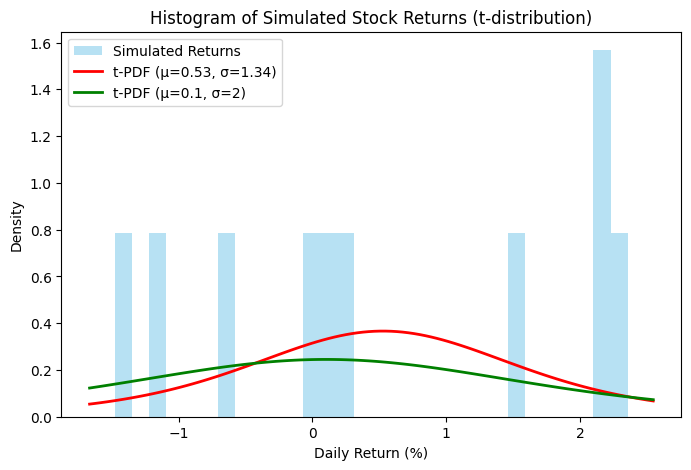

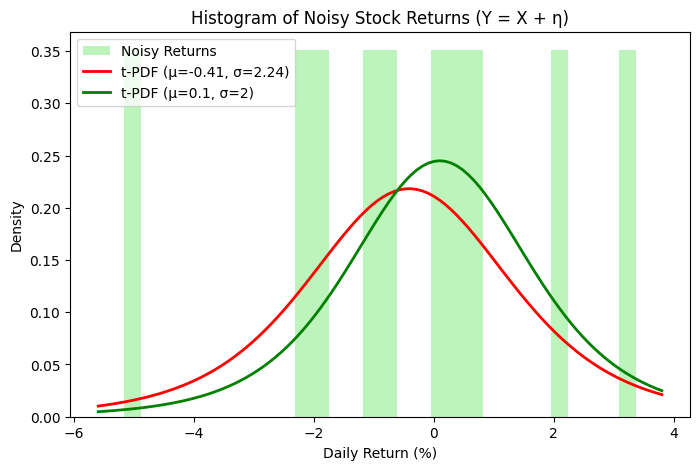

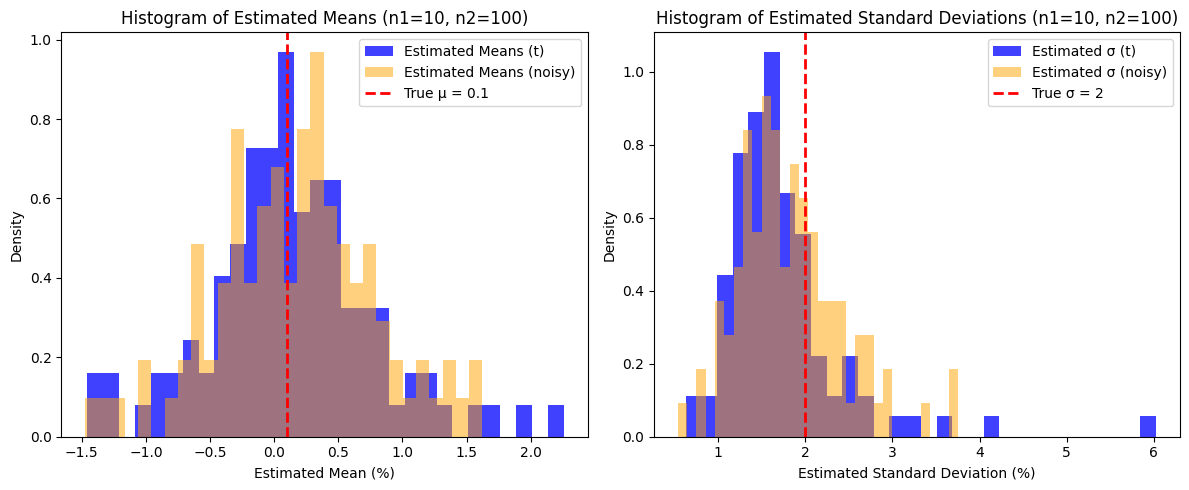

Summary of Simulation Results (Without Noise):
Estimated Mean (μ): Mean = 0.141, Std = 0.660
Estimated Std (σ): Mean = 1.730, Std = 0.706

Summary of Simulation Results (With Noise):
Estimated Mean (μ): Mean = 0.164, Std = 0.623
Estimated Std (σ): Mean = 1.834, Std = 0.595


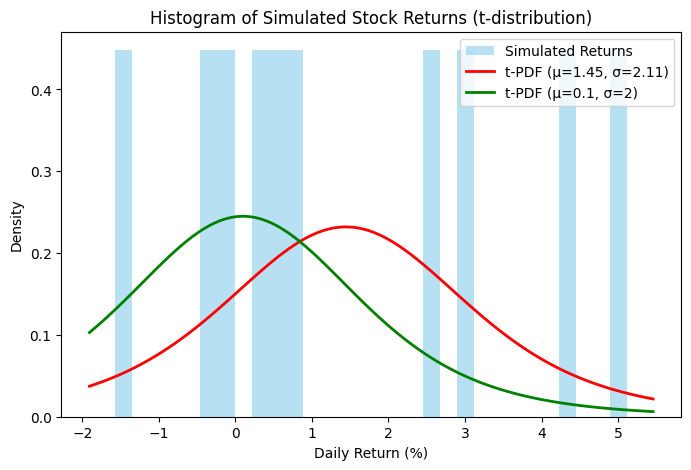

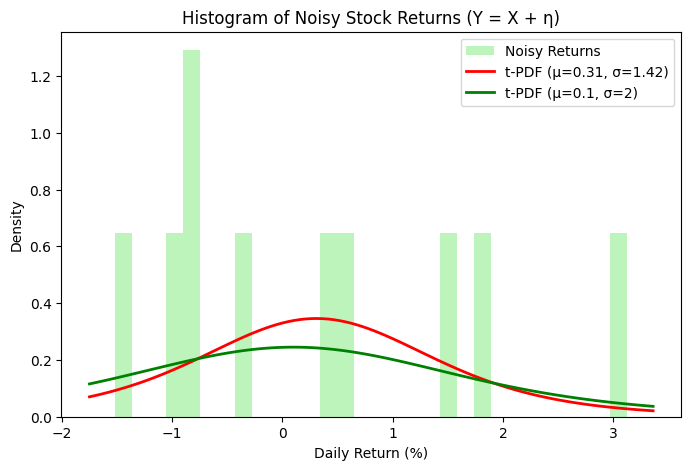

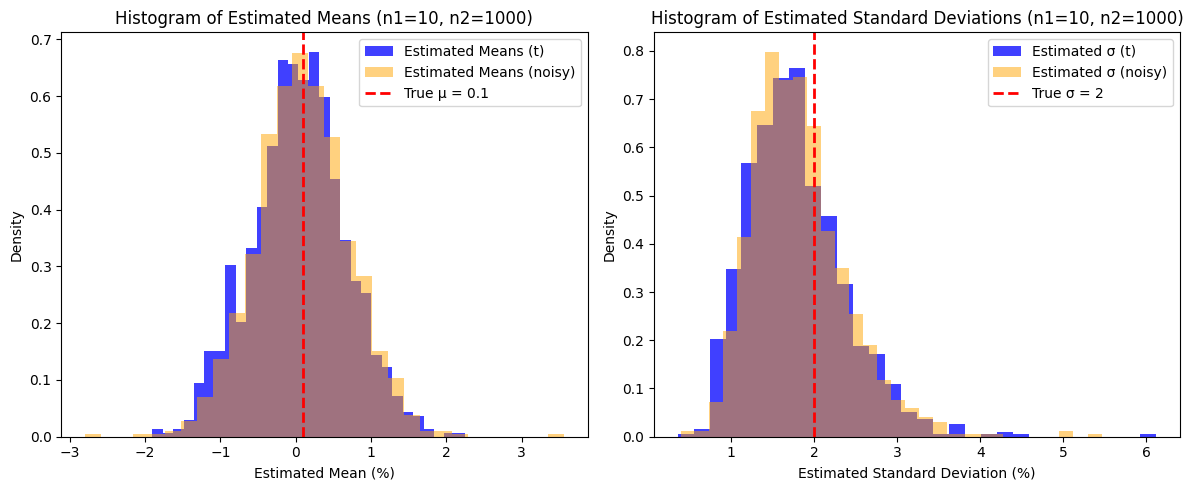

Summary of Simulation Results (Without Noise):
Estimated Mean (μ): Mean = 0.046, Std = 0.624
Estimated Std (σ): Mean = 1.786, Std = 0.598

Summary of Simulation Results (With Noise):
Estimated Mean (μ): Mean = 0.095, Std = 0.625
Estimated Std (σ): Mean = 1.821, Std = 0.575


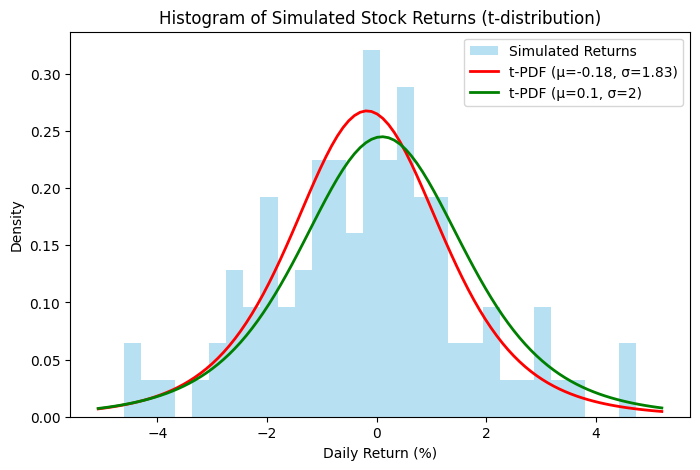

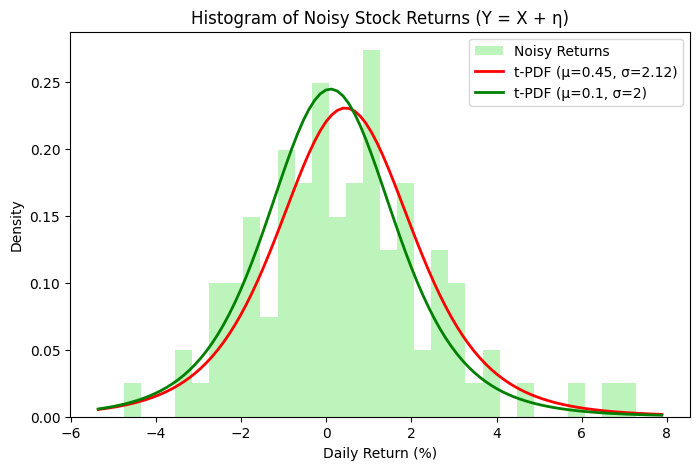

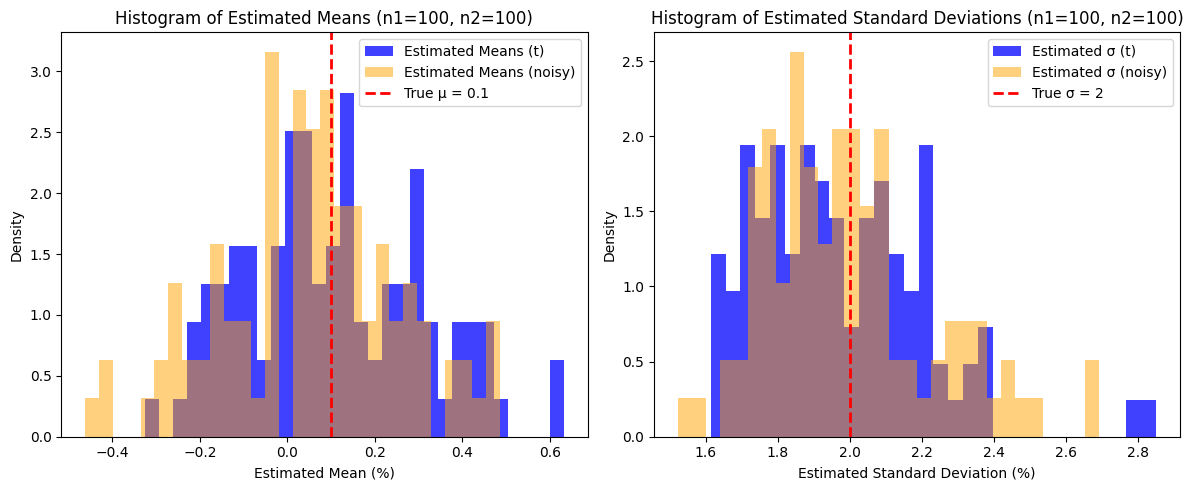

Summary of Simulation Results (Without Noise):
Estimated Mean (μ): Mean = 0.106, Std = 0.204
Estimated Std (σ): Mean = 1.975, Std = 0.233

Summary of Simulation Results (With Noise):
Estimated Mean (μ): Mean = 0.051, Std = 0.206
Estimated Std (σ): Mean = 1.994, Std = 0.231


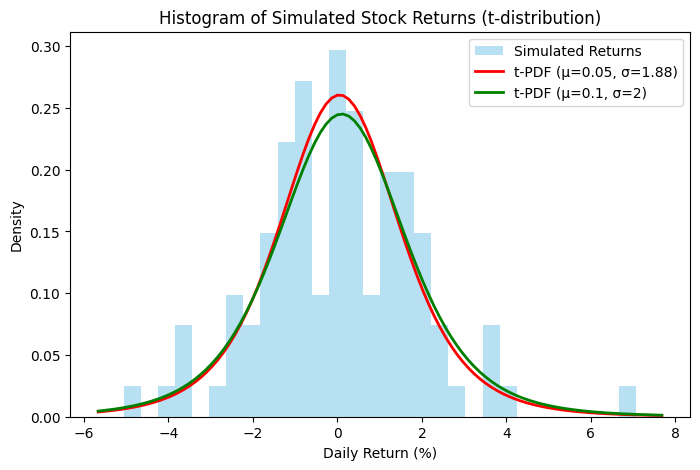

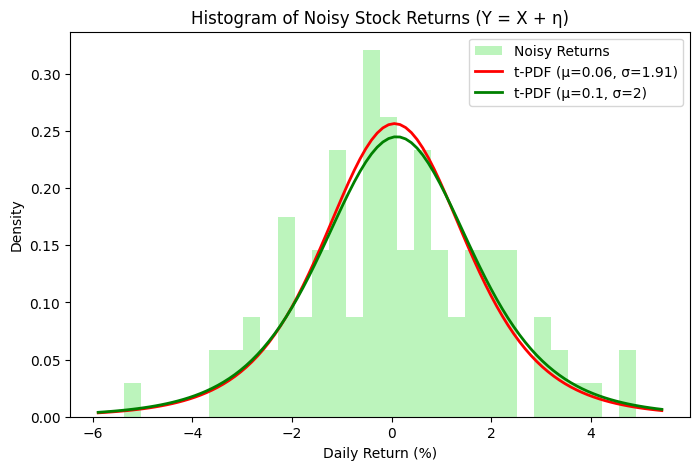

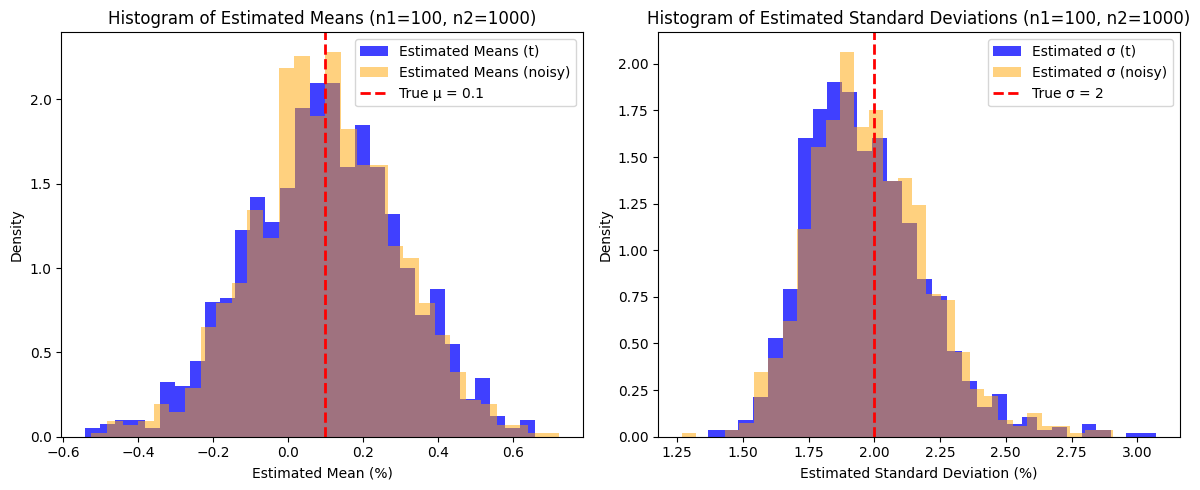

Summary of Simulation Results (Without Noise):
Estimated Mean (μ): Mean = 0.097, Std = 0.204
Estimated Std (σ): Mean = 1.968, Std = 0.231

Summary of Simulation Results (With Noise):
Estimated Mean (μ): Mean = 0.099, Std = 0.192
Estimated Std (σ): Mean = 1.985, Std = 0.225


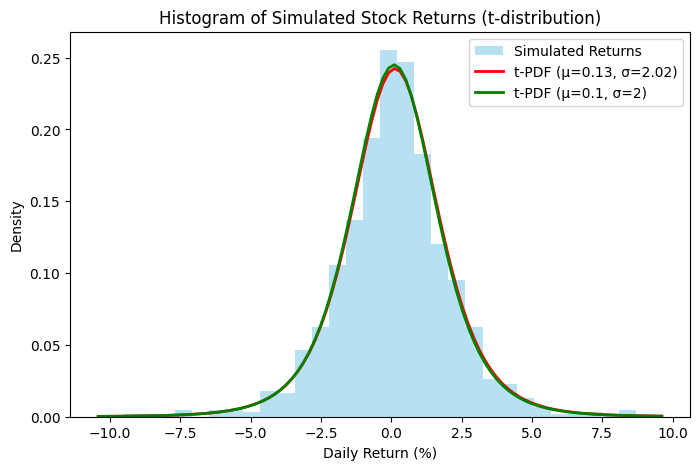

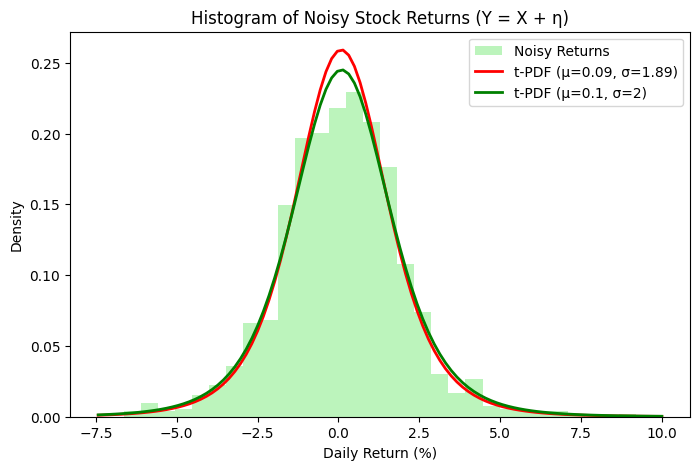

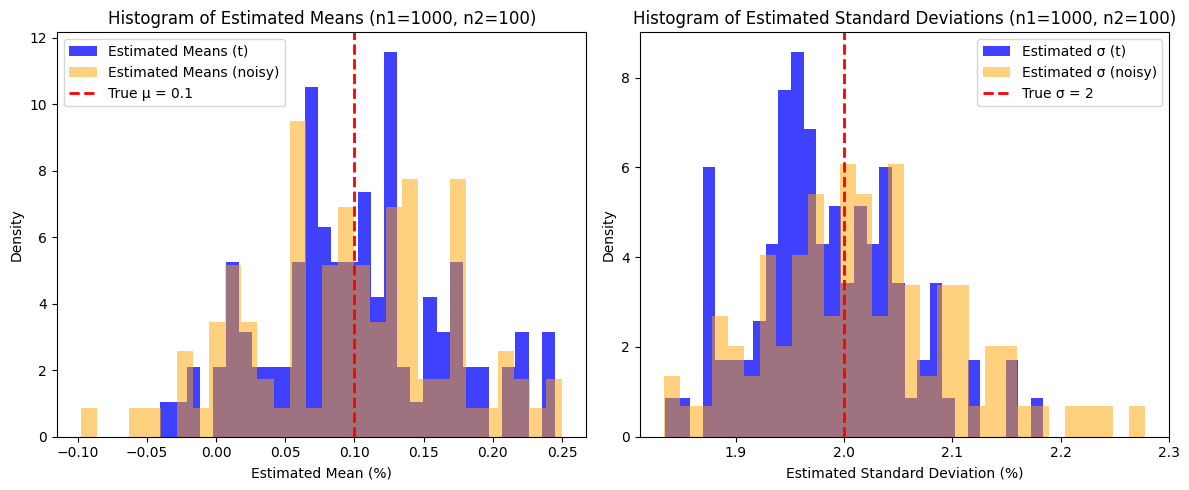

Summary of Simulation Results (Without Noise):
Estimated Mean (μ): Mean = 0.103, Std = 0.064
Estimated Std (σ): Mean = 1.984, Std = 0.069

Summary of Simulation Results (With Noise):
Estimated Mean (μ): Mean = 0.097, Std = 0.071
Estimated Std (σ): Mean = 2.019, Std = 0.090


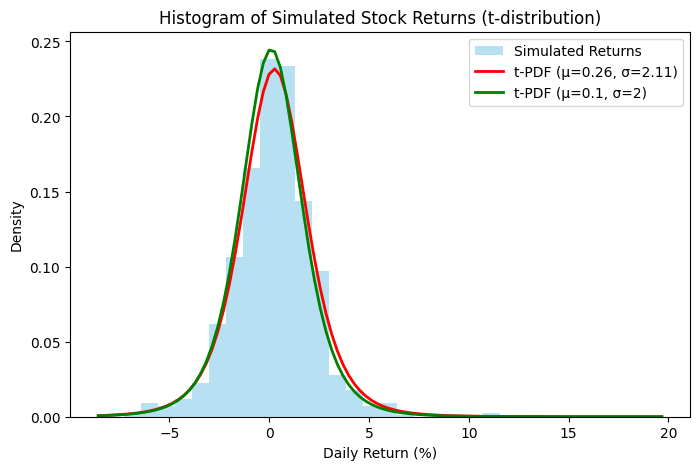

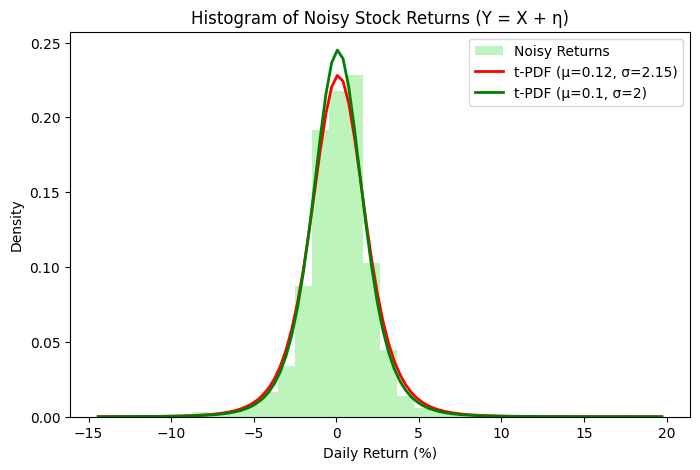

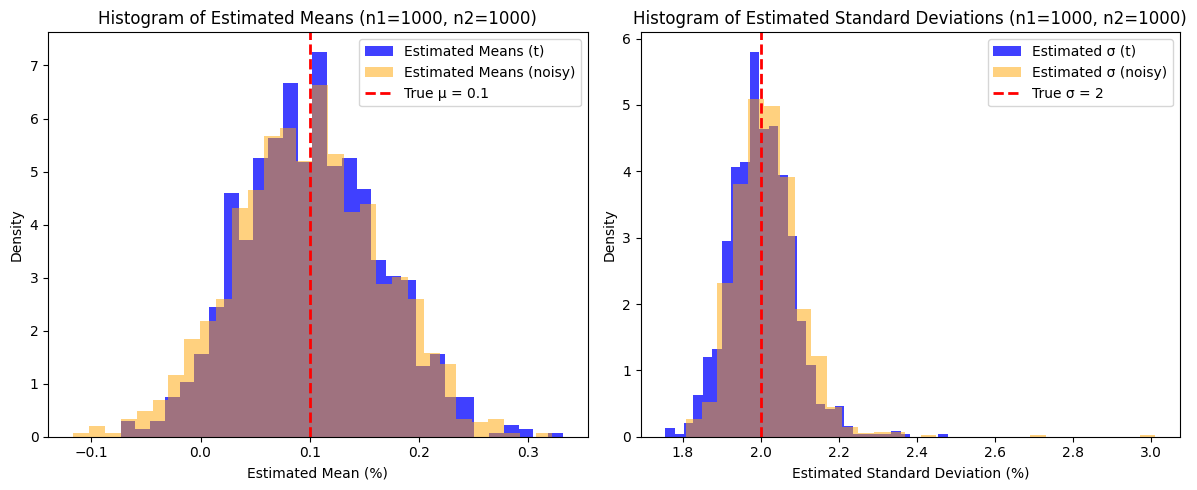

Summary of Simulation Results (Without Noise):
Estimated Mean (μ): Mean = 0.102, Std = 0.062
Estimated Std (σ): Mean = 2.002, Std = 0.083

Summary of Simulation Results (With Noise):
Estimated Mean (μ): Mean = 0.099, Std = 0.067
Estimated Std (σ): Mean = 2.019, Std = 0.088


In [137]:
if __name__=="__main__":
  main()